In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def scrape_kompas_money(num_pages=3):
    base_url = "https://indeks.kompas.com/?site=money"
    all_articles = []

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'
    }

    for page in range(1, num_pages + 1):
        url = f"{base_url}&page={page}"
        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f"⚠️ Gagal mengambil data dari {url} - Status Code: {response.status_code}")
            continue

        soup = BeautifulSoup(response.text, 'html.parser')

        articles = soup.select("div.articleItem")

        for article in articles:
            try:
                title = article.select_one("h2.articleTitle").text.strip()
                link = article.select_one("a.article-link")["href"].strip()
                img_tag = article.select_one("div.articleItem-img img")

                img_url = img_tag["src"].strip() if img_tag else "No Image"

                all_articles.append([title, link, img_url])
            except AttributeError:
                continue

        time.sleep(5)  # Hindari pemblokiran

    df = pd.DataFrame(all_articles, columns=['Judul', 'Link', 'Gambar'])
    return df

df = scrape_kompas_money(10)
df.to_csv("kompas_money.csv", index=False)
print(df.head())


                                               Judul  \
0  10 Pekerjaan Sampingan dengan Bayaran Tinggi d...   
1  Mentan: Saat Ini yang Dinikmati Tengkulak dala...   
2  Menkomdigi Meutya Hafid: Judi Online Telah Men...   
3  Kadin Akan Berkantor di Kementan, Mentan Amran...   
4  Saham Pesaing Starlink Asal Prancis Meroket Ha...   

                                                Link  \
0  https://money.kompas.com/read/2025/03/10/22380...   
1  https://money.kompas.com/read/2025/03/10/22130...   
2  https://money.kompas.com/read/2025/03/10/22000...   
3  https://money.kompas.com/read/2025/03/10/21380...   
4  https://money.kompas.com/read/2025/03/10/21301...   

                                              Gambar  
0  https://asset.kompas.com/crops/Pqnxs60D4QqqQBM...  
1  https://asset.kompas.com/crops/dB_WNwvFEYmr30W...  
2  https://asset.kompas.com/crops/6Euq9zFbBGD9A2C...  
3  https://asset.kompas.com/crops/FyIFJkKzIhQDv9M...  
4  https://asset.kompas.com/crops/fANRTUMPRX_miHb..

In [8]:
df

,Judul,Link,Gambar
0,10 Pekerjaan Sampingan dengan Bayaran Tinggi d...,https://money.kompas.com/read/2025/03/10/22380...,https://asset.kompas.com/crops/Pqnxs60D4QqqQBM...
1,Mentan: Saat Ini yang Dinikmati Tengkulak dala...,https://money.kompas.com/read/2025/03/10/22130...,https://asset.kompas.com/crops/dB_WNwvFEYmr30W...
2,Menkomdigi Meutya Hafid: Judi Online Telah Men...,https://money.kompas.com/read/2025/03/10/22000...,https://asset.kompas.com/crops/6Euq9zFbBGD9A2C...
3,"Kadin Akan Berkantor di Kementan, Mentan Amran...",https://money.kompas.com/read/2025/03/10/21380...,https://asset.kompas.com/crops/FyIFJkKzIhQDv9M...
4,Saham Pesaing Starlink Asal Prancis Meroket Ha...,https://money.kompas.com/read/2025/03/10/21301...,https://asset.kompas.com/crops/fANRTUMPRX_miHb...
...,...,...,...
145,"Laman Pintar.bi.go.id Tak Bisa Diakses, BI Min...",https://money.kompas.com/read/2025/03/09/11181...,https://asset.kompas.com/crops/7pG4xsquttn79b2...
146,"Pendaftaran Dibuka Besok, Kemenhub Siapkan 520...",https://money.kompas.com/read/2025/03/09/11000...,https://asset.kompas.com/crops/K1Qn8rFy7UrhLO2...
147,Macam-macam Alasan Pemerintah Tunda Pengangkat...,https://money.kompas.com/read/2025/03/09/10504...,https://asset.kompas.com/crops/w5bzQjW1UhT5SUR...
148,Harga Emas Terbaru Hari Ini 9 Maret 2025 di Pe...,https://money.kompas.com/read/2025/03/09/10402...,https://asset.kompas.com/crops/exBkT4_GenVkGjs...


In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv("kompas_money.csv")

factory = StemmerFactory()
stemmer = factory.create_stemmer()

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter spesial
    words = text.split()  # Tokenisasi
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Stemming + Stopword Removal
    return " ".join(words)

df['Judul_Clean'] = df['Judul'].astype(str).apply(preprocess_text)

print(df[['Judul', 'Judul_Clean']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 Judul  \
0    10 Pekerjaan Sampingan dengan Bayaran Tinggi d...   
1    Mentan: Saat Ini yang Dinikmati Tengkulak dala...   
2    Menkomdigi Meutya Hafid: Judi Online Telah Men...   
3    Kadin Akan Berkantor di Kementan, Mentan Amran...   
4    Saham Pesaing Starlink Asal Prancis Meroket Ha...   
..                                                 ...   
145  Laman Pintar.bi.go.id Tak Bisa Diakses, BI Min...   
146  Pendaftaran Dibuka Besok, Kemenhub Siapkan 520...   
147  Macam-macam Alasan Pemerintah Tunda Pengangkat...   
148  Harga Emas Terbaru Hari Ini 9 Maret 2025 di Pe...   
149  KAI Tebar Diskon Tiket Kereta Lebaran 2025, Ha...   

                                           Judul_Clean  
0                                  kerja samping bayar  
1        tan nikmat tengkulak rantai pangan capai rp t  
2    menkomdigi meutya hafid judi online krisis sos...  
3                      kadin kantor tan tan amran tuju  
4    saham saing s

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "Positif"
    elif polarity < 0:
        return "Negatif"
    else:
        return "Netral"

df['Sentimen'] = df['Judul_Clean'].apply(get_sentiment)

print(df[['Judul', 'Sentimen']])


                                                 Judul Sentimen
0    10 Pekerjaan Sampingan dengan Bayaran Tinggi d...   Netral
1    Mentan: Saat Ini yang Dinikmati Tengkulak dala...   Netral
2    Menkomdigi Meutya Hafid: Judi Online Telah Men...   Netral
3    Kadin Akan Berkantor di Kementan, Mentan Amran...   Netral
4    Saham Pesaing Starlink Asal Prancis Meroket Ha...   Netral
..                                                 ...      ...
145  Laman Pintar.bi.go.id Tak Bisa Diakses, BI Min...   Netral
146  Pendaftaran Dibuka Besok, Kemenhub Siapkan 520...   Netral
147  Macam-macam Alasan Pemerintah Tunda Pengangkat...  Negatif
148  Harga Emas Terbaru Hari Ini 9 Maret 2025 di Pe...   Netral
149  KAI Tebar Diskon Tiket Kereta Lebaran 2025, Ha...   Netral

[150 rows x 2 columns]


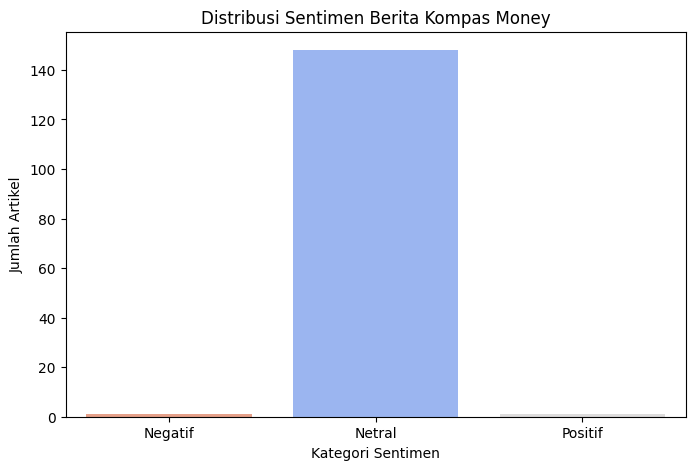

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x=df["Sentimen"], order=["Negatif", "Netral", "Positif"],  hue=df["Sentimen"], palette="coolwarm", legend=False)

plt.title("Distribusi Sentimen Berita Kompas Money")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Artikel")
plt.show()

In [2]:
def scrape_kompas_syariah(num_pages=3):
    base_url = "https://money.kompas.com/syariah/"
    all_articles = []

    for page in range(1, num_pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, 'html.parser')

        articles = soup.find_all("div", class_="articleHL-item")

        for article in articles:
            try:
                title = article.find("h1", class_="articleTitle").text.strip()
                link = article.find("a")["href"].strip()
                img_url = article.find("img")["src"].strip()
                all_articles.append([title, link, img_url])
            except:
                continue

        time.sleep(2)  # Hindari pemblokiran dengan delay

    return pd.DataFrame(all_articles, columns=['Judul', 'Link', 'Gambar'])

df = scrape_kompas_syariah(100)
df.to_csv("kompas_syariah.csv", index=False)
print(df.head())


                                               Judul  \
0  Zakat Mal: Pengertian, Besaran, dan Kapan Haru...   
1  Belum Bisa Digunakan, Aplikasi BYOND BSI Masih...   
2  Bank Muamalat dan Insight Investments Manageme...   
3  OJK Terbitkan Tiga Pedoman Produk Perbankan Sy...   
4  Ekonom: Aset Industri Perbankan Syariah Bakal ...   

                                                Link  \
0  https://money.kompas.com/read/2025/03/10/19460...   
1  https://money.kompas.com/read/2025/02/11/17355...   
2  https://money.kompas.com/read/2024/12/30/12332...   
3  https://money.kompas.com/read/2024/10/27/18462...   
4  https://money.kompas.com/read/2024/09/03/16064...   

                                              Gambar  
0  https://asset.kompas.com/crops/D5OXCDdEhmTl8jH...  
1  https://asset.kompas.com/crops/vUx-vzAL8bdh5xu...  
2  https://asset.kompas.com/crops/aoQNgKj6KOgmTZk...  
3  https://asset.kompas.com/crops/2hlP_GCDr3lIvx_...  
4  https://asset.kompas.com/crops/hYrJvFERh1UjZh2..

In [3]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')

df = pd.read_csv("kompas_syariah.csv")

factory = StemmerFactory()
stemmer = factory.create_stemmer()
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = text.lower()  # Ubah ke huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Hapus link
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter khusus
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return " ".join(tokens)

df["Clean_Judul"] = df["Judul"].apply(clean_text)

df.to_csv("kompas_syariah_cleaned.csv", index=False)

print(df.head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               Judul  \
0  Zakat Mal: Pengertian, Besaran, dan Kapan Haru...   
1  Belum Bisa Digunakan, Aplikasi BYOND BSI Masih...   
2  Bank Muamalat dan Insight Investments Manageme...   
3  OJK Terbitkan Tiga Pedoman Produk Perbankan Sy...   
4  Ekonom: Aset Industri Perbankan Syariah Bakal ...   

                                                Link  \
0  https://money.kompas.com/read/2025/03/10/19460...   
1  https://money.kompas.com/read/2025/02/11/17355...   
2  https://money.kompas.com/read/2024/12/30/12332...   
3  https://money.kompas.com/read/2024/10/27/18462...   
4  https://money.kompas.com/read/2024/09/03/16064...   

                                              Gambar  \
0  https://asset.kompas.com/crops/D5OXCDdEhmTl8jH...   
1  https://asset.kompas.com/crops/vUx-vzAL8bdh5xu...   
2  https://asset.kompas.com/crops/aoQNgKj6KOgmTZk...   
3  https://asset.kompas.com/crops/2hlP_GCDr3lIvx_...   
4  https://asset.kompas.com/crops/hYrJvFERh1Uj

In [5]:
def categorize_news(title):
    title = title.lower()
    if any(word in title for word in ["zakat", "sedekah", "infaq"]):
        return "Zakat & Donasi"
    elif any(word in title for word in ["investasi", "saham", "reksadana"]):
        return "Investasi Syariah"
    elif any(word in title for word in ["bank", "perbankan", "ojk"]):
        return "Perbankan Syariah"
    elif any(word in title for word in ["ekonomi", "inflasi", "industri"]):
        return "Ekonomi Syariah"
    else:
        return "Lainnya"

df["Kategori"] = df["Clean_Judul"].apply(categorize_news)

df.to_csv("kompas_syariah_labeled.csv", index=False)
print(df[["Judul", "Kategori"]].head())


                                               Judul           Kategori
0  Zakat Mal: Pengertian, Besaran, dan Kapan Haru...     Zakat & Donasi
1  Belum Bisa Digunakan, Aplikasi BYOND BSI Masih...            Lainnya
2  Bank Muamalat dan Insight Investments Manageme...  Perbankan Syariah
3  OJK Terbitkan Tiga Pedoman Produk Perbankan Sy...  Perbankan Syariah
4  Ekonom: Aset Industri Perbankan Syariah Bakal ...    Ekonomi Syariah


<ipython-input-6-fcd2d4ea9093>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Kategori"], order=df["Kategori"].value_counts().index, palette="viridis")


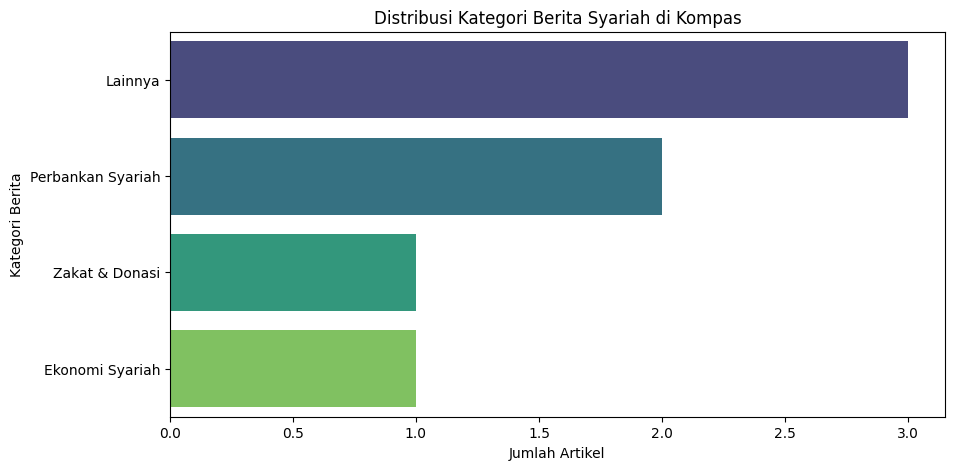

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y=df["Kategori"], order=df["Kategori"].value_counts().index, palette="viridis")

plt.xlabel("Jumlah Artikel")
plt.ylabel("Kategori Berita")
plt.title("Distribusi Kategori Berita Syariah di Kompas")
plt.show()


In [14]:
from transformers import pipeline

# Load model IndoBERT Sentiment
sentiment_pipeline = pipeline("text-classification", model="ayameRushia/bert-base-indonesian-1.5G-sentiment-analysis-smsa")

df["Sentimen"] = df["Clean_Judul"].apply(lambda x: sentiment_pipeline(x)[0]['label'])

df.to_csv("kompas_syariah_sentiment.csv", index=False)

print(df[["Judul", "Kategori", "Sentimen"]].head())

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/476k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


                                               Judul           Kategori  \
0  Zakat Mal: Pengertian, Besaran, dan Kapan Haru...     Zakat & Donasi   
1  Belum Bisa Digunakan, Aplikasi BYOND BSI Masih...            Lainnya   
2  Bank Muamalat dan Insight Investments Manageme...  Perbankan Syariah   
3  OJK Terbitkan Tiga Pedoman Produk Perbankan Sy...  Perbankan Syariah   
4  Ekonom: Aset Industri Perbankan Syariah Bakal ...    Ekonomi Syariah   

  Sentimen  
0  Neutral  
1  Neutral  
2  Neutral  
3  Neutral  
4  Neutral  


In [17]:
df

,Judul,Link,Gambar,Clean_Judul,Kategori,Sentimen
0,"Zakat Mal: Pengertian, Besaran, dan Kapan Haru...",https://money.kompas.com/read/2025/03/10/19460...,https://asset.kompas.com/crops/D5OXCDdEhmTl8jH...,zakat mal erti besar bayar,Zakat & Donasi,Neutral
1,"Belum Bisa Digunakan, Aplikasi BYOND BSI Masih...",https://money.kompas.com/read/2025/02/11/17355...,https://asset.kompas.com/crops/vUx-vzAL8bdh5xu...,aplikasi byond bsi proses upgrade,Lainnya,Neutral
2,Bank Muamalat dan Insight Investments Manageme...,https://money.kompas.com/read/2024/12/30/12332...,https://asset.kompas.com/crops/aoQNgKj6KOgmTZk...,bank muamalat insight investments management r...,Perbankan Syariah,Neutral
3,OJK Terbitkan Tiga Pedoman Produk Perbankan Sy...,https://money.kompas.com/read/2024/10/27/18462...,https://asset.kompas.com/crops/2hlP_GCDr3lIvx_...,ojk terbit pedoman produk perban syariah,Perbankan Syariah,Neutral
4,Ekonom: Aset Industri Perbankan Syariah Bakal ...,https://money.kompas.com/read/2024/09/03/16064...,https://asset.kompas.com/crops/hYrJvFERh1UjZh2...,ekonom aset industri perban syariah tebus rp t...,Ekonomi Syariah,Neutral
